In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
# Cargar el archivo Excel
file_path = 'C:/Users/svera3/OneDrive - SLB/SVERA3/MAESTRIA/Base de Datos BO.xlsx'  # Reemplaza con la ruta correcta del archivo
df = pd.read_excel(file_path, index_col=False)

In [2]:
df.rename({'Fecha de compra':'Fecha', 'UM': 'Unidad_medida', 'COD_CLIENTE':'ID', 
           'Nombre Cliente': 'Cliente', 'Zona de CIO':'Zona_ventas', 'Nombre Zona':'Nombre_zona', 'Toneladas':'Toneladas'}, axis=1, inplace=True)

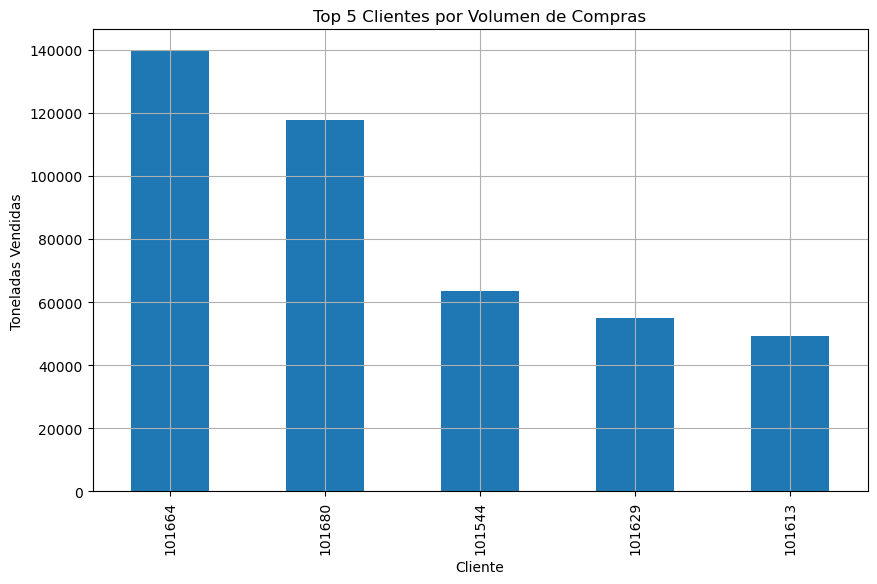

In [3]:
# Gráfico 2: Segmentación de Clientes por Volumen Total de Compras
top_customers = df.groupby('ID').sum(numeric_only=True)['Toneladas'].sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar')
plt.title('Top 5 Clientes por Volumen de Compras')
plt.xlabel('Cliente')
plt.ylabel('Toneladas Vendidas')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN
from sklearn.preprocessing import MinMaxScaler


# Convertir la columna 'Fecha de compra' a datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Agrupar por COD_CLIENTE y Fecha de compra, sumando las toneladas
df_grouped = df.groupby(['ID', 'Fecha'])['Toneladas'].sum().reset_index()

# Agrupar por cliente y calcular la suma total de toneladas para cada uno
df_totales_por_cliente = df_grouped.groupby('ID')['Toneladas'].sum().reset_index()

# Ordenar por las toneladas para obtener los 5 mejores clientes
top_5_clientes = df_totales_por_cliente.sort_values(by='Toneladas', ascending=False).head(5)

# Filtrar el dataframe original por los 5 mejores clientes
df_top_5 = df_grouped[df_grouped['ID'].isin(top_5_clientes['ID'])]

# Preparación de los datos para modelado (suma de toneladas para los 5 mejores clientes)
df_top_5 = df_top_5.groupby('Fecha')['Toneladas'].sum().reset_index()

# Resampleo diario para obtener las toneladas por día (o puedes cambiarlo a mensual usando 'M')
df_top_5 = df_top_5.set_index('Fecha')
df_top_5 = df_top_5.resample('D').sum()  # Cambiar 'D' a 'M' para resamplear por meses

df_cliente = df_top_5





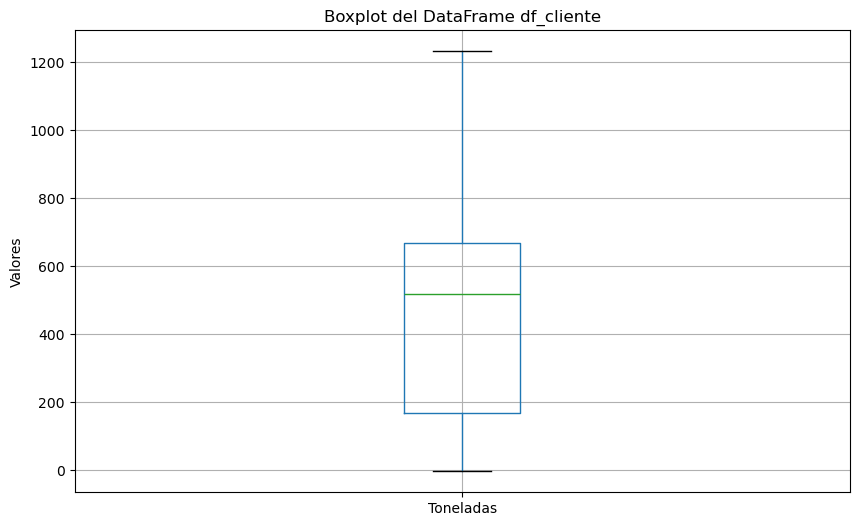

In [5]:
plt.figure(figsize=(10, 6))
df_cliente.boxplot()
plt.title('Boxplot del DataFrame df_cliente')
plt.ylabel('Valores')
plt.show()

In [6]:
percentiles = df_cliente.describe(percentiles=[0.25, 0.5, 0.75])

print(percentiles)

         Toneladas
count   928.000000
mean    457.842619
std     275.616074
min      -3.000000
25%     168.500000
50%     517.500000
75%     668.250000
max    1233.000000


C:\Users\svera3\AppData\Local\Temp\ipykernel_16488\2660127250.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cliente['Toneladas'], bins=30, kde=True)


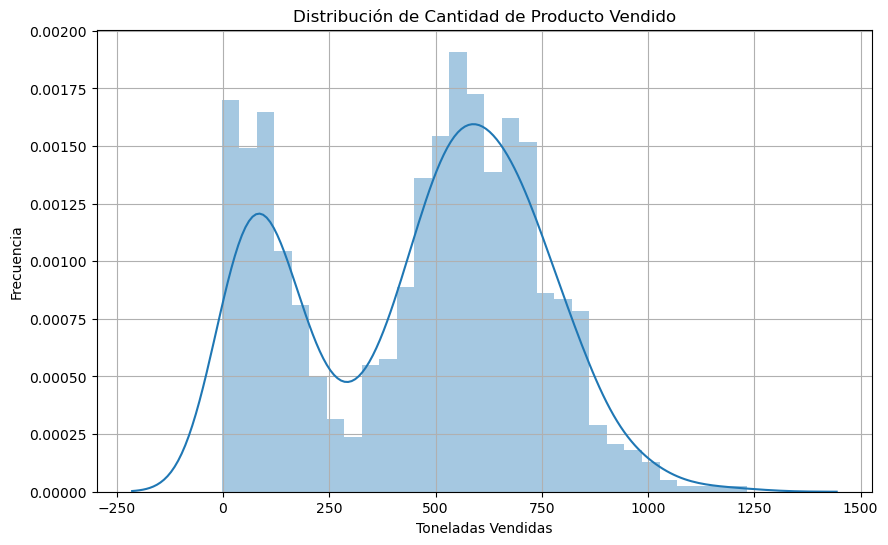

In [7]:
# Gráfico 1: Distribución de las Ventas (Histograma)
plt.figure(figsize=(10, 6))
sns.distplot(df_cliente['Toneladas'], bins=30, kde=True)
plt.title('Distribución de Cantidad de Producto Vendido')
plt.xlabel('Toneladas Vendidas')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [8]:
# Filtrando el DataFrame para eliminar los valores menores a 0 
df_cliente = df_cliente[df_cliente['Toneladas'] >= 0]

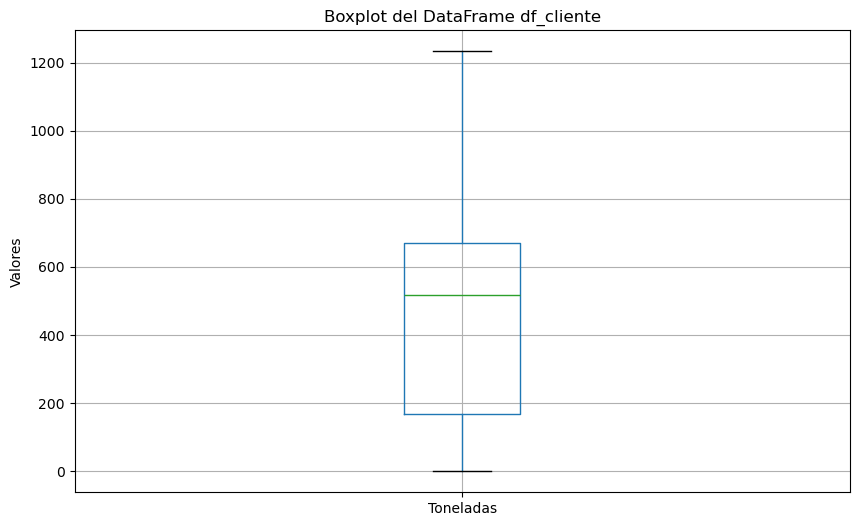

In [9]:
plt.figure(figsize=(10, 6))
df_cliente.boxplot()
plt.title('Boxplot del DataFrame df_cliente')
plt.ylabel('Valores')
plt.show()

C:\Users\svera3\AppData\Local\Temp\ipykernel_16488\2660127250.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cliente['Toneladas'], bins=30, kde=True)


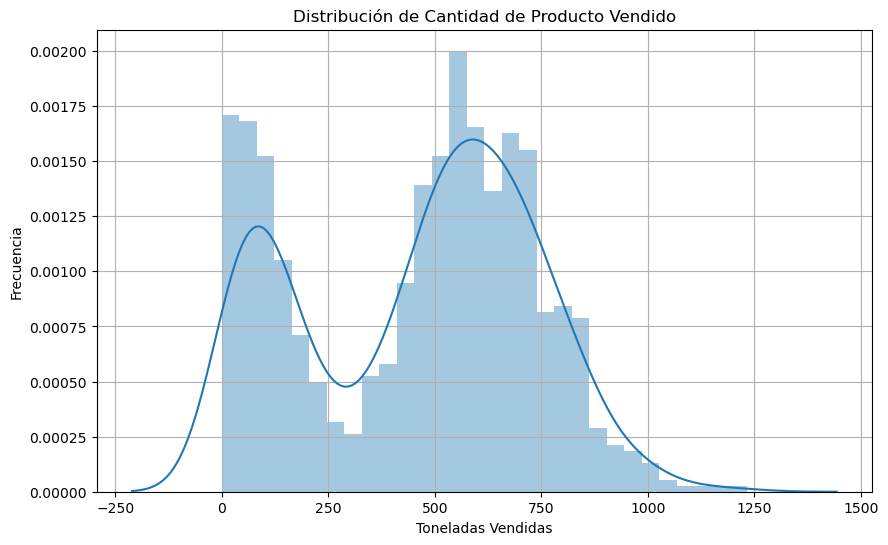

In [10]:
# Gráfico 1: Distribución de las Ventas (Histograma)
plt.figure(figsize=(10, 6))
sns.distplot(df_cliente['Toneladas'], bins=30, kde=True)
plt.title('Distribución de Cantidad de Producto Vendido')
plt.xlabel('Toneladas Vendidas')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

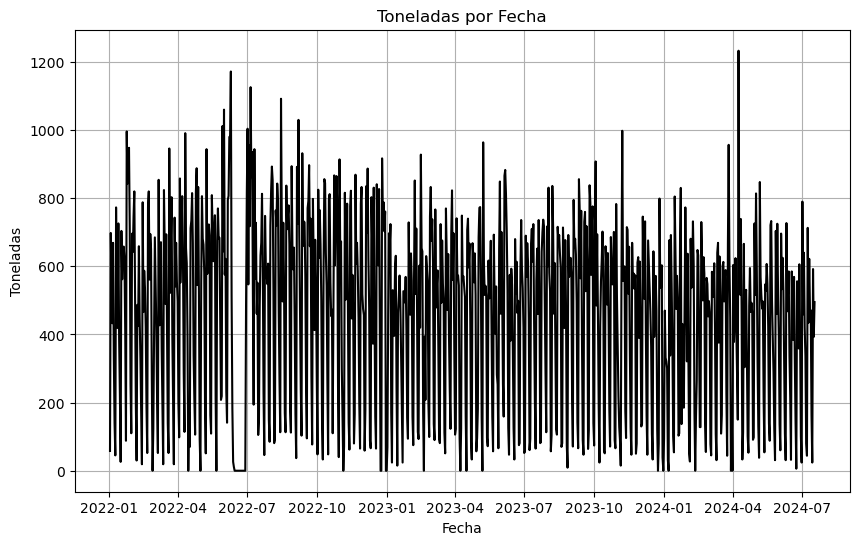

In [11]:
# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(df_cliente.index, df_cliente['Toneladas'], linestyle='-', color='black')

# Personalización del gráfico
plt.title('Toneladas por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Toneladas')
plt.grid(True)


# Mostrar el gráfico
plt.show()

In [12]:
# Escalado de datos
scaler = MinMaxScaler(feature_range=(0, 1))
df_cliente_scaled = scaler.fit_transform(df_cliente)

# Crear conjunto de datos con secuencias de tiempo
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 30
X, y = create_dataset(df_cliente_scaled, time_step)

# Reshape para LSTM y RNN
X = X.reshape(X.shape[0], X.shape[1], 1)

# Dividir los datos en conjuntos de entrenamiento y prueba dejando el 20% de los últimos valores para pruebas
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Evaluación de modelos
results = {}


In [13]:
# Modelo RNN
model_rnn = Sequential()
model_rnn.add(SimpleRNN(50, return_sequences=True, input_shape=(time_step, 1)))
model_rnn.add(SimpleRNN(50))
model_rnn.add(Dense(1))
model_rnn.compile(optimizer='adam', loss='mean_squared_error')
model_rnn.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
y_pred_rnn = model_rnn.predict(X_test)
results['RNN'] = np.sqrt(mean_squared_error(y_test, y_pred_rnn))

C:\Users\svera3\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [14]:
# Modelo LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model_lstm.add(LSTM(50))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
y_pred_lstm = model_lstm.predict(X_test)
results['LSTM'] = np.sqrt(mean_squared_error(y_test, y_pred_lstm))


C:\Users\svera3\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [15]:
# Generar predicciones para los próximos 3 meses utilizando el modelo RNN

# Obtener la última fecha del conjunto de datos
last_date = df_cliente.index[-1]

# Generar fechas futuras para los próximos 3 meses (90 días)
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=90, freq='D')

# Preparar la secuencia de datos para predicción (últimos time_step valores del conjunto de datos)
data_for_prediction_rnn = df_cliente_scaled[-time_step:]

# Lista para almacenar las predicciones del modelo RNN
predictions_rnn = []

# Realizar predicciones para los siguientes 90 días con el modelo RNN
for _ in range(len(future_dates)):
    # Reshape de la secuencia actual
    input_data_rnn = data_for_prediction_rnn.reshape((1, time_step, 1))
    
    # Predecir el próximo valor con el modelo RNN
    predicted_value_rnn = model_rnn.predict(input_data_rnn, verbose=0)[0][0]
    
    # Añadir la predicción a la lista
    predictions_rnn.append(predicted_value_rnn)
    
    # Actualizar la secuencia de datos para la siguiente predicción
    data_for_prediction_rnn = np.append(data_for_prediction_rnn[1:], predicted_value_rnn).reshape(time_step, 1)

# Invertir el escalado de las predicciones del modelo RNN para obtener valores originales
predictions_rnn_original_scale = scaler.inverse_transform(np.array(predictions_rnn).reshape(-1, 1))

# Crear un DataFrame con las predicciones del modelo RNN
df_predictions = pd.DataFrame({
    'Fecha': future_dates,
    'Toneladas_Pred_RNN': predictions_rnn_original_scale.flatten()
})

# Generar predicciones para los próximos 3 meses utilizando el modelo LSTM

# Preparar la secuencia de datos para predicción (últimos time_step valores del conjunto de datos)
data_for_prediction_lstm = df_cliente_scaled[-time_step:]

# Lista para almacenar las predicciones del modelo LSTM
predictions_lstm = []

# Realizar predicciones para los siguientes 90 días con el modelo LSTM
for _ in range(len(future_dates)):
    # Reshape de la secuencia actual
    input_data_lstm = data_for_prediction_lstm.reshape((1, time_step, 1))
    
    # Predecir el próximo valor con el modelo LSTM
    predicted_value_lstm = model_lstm.predict(input_data_lstm, verbose=0)[0][0]
    
    # Añadir la predicción a la lista
    predictions_lstm.append(predicted_value_lstm)
    
    # Actualizar la secuencia de datos para la siguiente predicción
    data_for_prediction_lstm = np.append(data_for_prediction_lstm[1:], predicted_value_lstm).reshape(time_step, 1)

# Invertir el escalado de las predicciones del modelo LSTM para obtener valores originales
predictions_lstm_original_scale = scaler.inverse_transform(np.array(predictions_lstm).reshape(-1, 1))

# Añadir las predicciones del modelo LSTM al DataFrame de predicciones
df_predictions['Toneladas_Pred_LSTM'] = predictions_lstm_original_scale.flatten()

# Mostrar el DataFrame con las predicciones de RNN y LSTM
df_predictions.head(10)  # Mostrar las primeras 10 predicciones


Fecha  Toneladas_Pred_RNN  Toneladas_Pred_LSTM
0 2024-07-18          739.934753           470.330627
1 2024-07-19          432.625946           316.764832
2 2024-07-20          235.706573            57.358253
3 2024-07-21            7.986547           122.473793
4 2024-07-22          694.899109           577.031677
5 2024-07-23          661.301270           535.395203
6 2024-07-24          412.608643           516.566895
7 2024-07-25          677.416626           484.112396
8 2024-07-26          397.226013           318.881989
9 2024-07-27          151.543991            51.241154

In [16]:
# Convertir datos para RandomForest y XGBoost
X_rf = X.reshape(X.shape[0], X.shape[1])
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y, test_size=0.2, random_state=42)

# Modelo Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_rf, y_train_rf)
y_pred_rf = rf.predict(X_test_rf)
results['Random Forest'] = np.sqrt(mean_squared_error(y_test_rf, y_pred_rf))

In [17]:
# Modelo XGBoost
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)
xg_reg.fit(X_train_rf, y_train_rf)
y_pred_xgb = xg_reg.predict(X_test_rf)
results['XGBoost'] = np.sqrt(mean_squared_error(y_test_rf, y_pred_xgb))

# Imprimir los resultados de RMSE para cada modelo
for model_name, rmse in results.items():
    print(f'{model_name}: RMSE = {rmse:.4f}')


RNN: RMSE = 0.1508
LSTM: RMSE = 0.1185
Random Forest: RMSE = 0.1126
XGBoost: RMSE = 0.1233


In [18]:
from sklearn.metrics import mean_absolute_error, r2_score

# Definir un pequeño valor epsilon para evitar divisiones por cero
epsilon = 1e-10

# Filtrar valores pequeños en y_test
mask_rnn = y_test > epsilon
mask_rf = y_test_rf > epsilon

# Calcular MAE, MAPE y R^2 para cada modelo
mae_rnn = mean_absolute_error(y_test, y_pred_rnn)
mape_rnn = np.mean(np.abs((y_test[mask_rnn] - y_pred_rnn[mask_rnn]) / y_test[mask_rnn])) * 100
r2_rnn = r2_score(y_test, y_pred_rnn)

mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mape_lstm = np.mean(np.abs((y_test[mask_rnn] - y_pred_lstm[mask_rnn]) / y_test[mask_rnn])) * 100
r2_lstm = r2_score(y_test, y_pred_lstm)

mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)
mape_rf = np.mean(np.abs((y_test_rf[mask_rf] - y_pred_rf[mask_rf]) / y_test_rf[mask_rf])) * 100
r2_rf = r2_score(y_test_rf, y_pred_rf)

mae_xgb = mean_absolute_error(y_test_rf, y_pred_xgb)
mape_xgb = np.mean(np.abs((y_test_rf[mask_rf] - y_pred_xgb[mask_rf]) / y_test_rf[mask_rf])) * 100
r2_xgb = r2_score(y_test_rf, y_pred_xgb)

# Imprimir los resultados de MAE, MAPE y R^2 para cada modelo
print(f'RNN: MAE = {mae_rnn:.4f}, MAPE = {mape_rnn:.2f}%, R^2 = {r2_rnn:.4f}')
print(f'LSTM: MAE = {mae_lstm:.4f}, MAPE = {mape_lstm:.2f}%, R^2 = {r2_lstm:.4f}')
print(f'Random Forest: MAE = {mae_rf:.4f}, MAPE = {mape_rf:.2f}%, R^2 = {r2_rf:.4f}')
print(f'XGBoost: MAE = {mae_xgb:.4f}, MAPE = {mape_xgb:.2f}%, R^2 = {r2_xgb:.4f}')



RNN: MAE = 0.1106, MAPE = 239.97%, R^2 = 0.4070
LSTM: MAE = 0.0855, MAPE = 209.25%, R^2 = 0.6339
Random Forest: MAE = 0.0848, MAPE = 43.44%, R^2 = 0.7490
XGBoost: MAE = 0.0950, MAPE = 57.37%, R^2 = 0.6986


In [19]:
# Generar predicciones para los próximos 3 meses utilizando el modelo Random Forest

# Preparar la secuencia de datos para predicción (últimos time_step valores del conjunto de datos)
data_for_prediction_rf = df_cliente_scaled[-time_step:].reshape(1, -1)

# Lista para almacenar las predicciones del modelo Random Forest
predictions_rf = []

# Realizar predicciones para los siguientes 90 días con el modelo Random Forest
for _ in range(len(future_dates)):
    # Predecir el próximo valor con el modelo Random Forest
    predicted_value_rf = rf.predict(data_for_prediction_rf)[0]
    
    # Añadir la predicción a la lista
    predictions_rf.append(predicted_value_rf)
    
    # Actualizar la secuencia de datos para la siguiente predicción
    # Añadir la predicción y eliminar el primer valor de la secuencia
    data_for_prediction_rf = np.append(data_for_prediction_rf[:, 1:], predicted_value_rf).reshape(1, -1)

# Invertir el escalado de las predicciones del modelo Random Forest para obtener valores originales
predictions_rf_original_scale = scaler.inverse_transform(np.array(predictions_rf).reshape(-1, 1))

# Añadir las predicciones del modelo Random Forest al DataFrame de predicciones
df_predictions['Toneladas_Pred_RF'] = predictions_rf_original_scale.flatten()

# Generar predicciones para los próximos 3 meses utilizando el modelo XGBoost

# Preparar la secuencia de datos para predicción (últimos time_step valores del conjunto de datos)
data_for_prediction_xgb = df_cliente_scaled[-time_step:].reshape(1, -1)

# Lista para almacenar las predicciones del modelo XGBoost
predictions_xgb = []

# Realizar predicciones para los siguientes 90 días con el modelo XGBoost
for _ in range(len(future_dates)):
    # Predecir el próximo valor con el modelo XGBoost
    predicted_value_xgb = xg_reg.predict(data_for_prediction_xgb)[0]
    
    # Añadir la predicción a la lista
    predictions_xgb.append(predicted_value_xgb)
    
    # Actualizar la secuencia de datos para la siguiente predicción
    # Añadir la predicción y eliminar el primer valor de la secuencia
    data_for_prediction_xgb = np.append(data_for_prediction_xgb[:, 1:], predicted_value_xgb).reshape(1, -1)

# Invertir el escalado de las predicciones del modelo XGBoost para obtener valores originales
predictions_xgb_original_scale = scaler.inverse_transform(np.array(predictions_xgb).reshape(-1, 1))

# Añadir las predicciones del modelo XGBoost al DataFrame de predicciones
df_predictions['Toneladas_Pred_XGB'] = predictions_xgb_original_scale.flatten()

# Mostrar el DataFrame con las predicciones de todos los modelos
df_predictions.head(10)  # Mostrar las primeras 10 predicciones


Fecha  Toneladas_Pred_RNN  Toneladas_Pred_LSTM  Toneladas_Pred_RF  \
0 2024-07-18          739.934753           470.330627           562.1550   
1 2024-07-19          432.625946           316.764832           409.1770   
2 2024-07-20          235.706573            57.358253           157.7210   
3 2024-07-21            7.986547           122.473793            37.7400   
4 2024-07-22          694.899109           577.031677           662.1340   
5 2024-07-23          661.301270           535.395203           544.3535   
6 2024-07-24          412.608643           516.566895           495.8965   
7 2024-07-25          677.416626           484.112396           551.1800   
8 2024-07-26          397.226013           318.881989           397.2550   
9 2024-07-27          151.543991            51.241154           111.7365   

   Toneladas_Pred_XGB  
0          580.902039  
1          405.860229  
2          166.416718  
3          159.828400  
4          635.893066  
5          576.317505  
6          570.275024  
7          608.308289  
8          411.742767  
9          159.828400

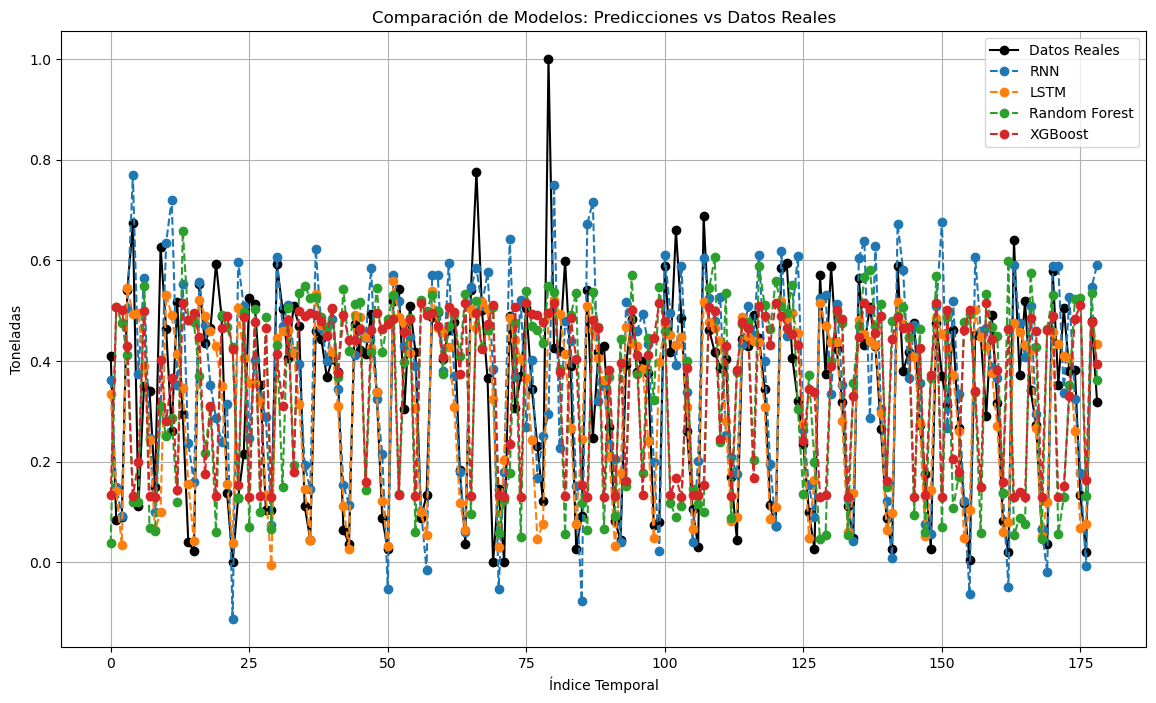

In [20]:
# Graficar resultados de entrenamiento vs. datos reales
plt.figure(figsize=(14, 8))

# Datos Reales
plt.plot(y_test, label='Datos Reales',marker='o', color='black')

# RNN
plt.plot(y_pred_rnn, label='RNN',marker='o', linestyle='--')

# LSTM
plt.plot(y_pred_lstm, label='LSTM',marker='o', linestyle='--')

# Random Forest
plt.plot(y_pred_rf, label='Random Forest',marker='o', linestyle='--')

# XGBoost
plt.plot(y_pred_xgb, label='XGBoost',marker='o', linestyle='--')

plt.title('Comparación de Modelos: Predicciones vs Datos Reales')
plt.xlabel('Índice Temporal')
plt.ylabel('Toneladas')
plt.legend()
plt.grid(True)
plt.show()



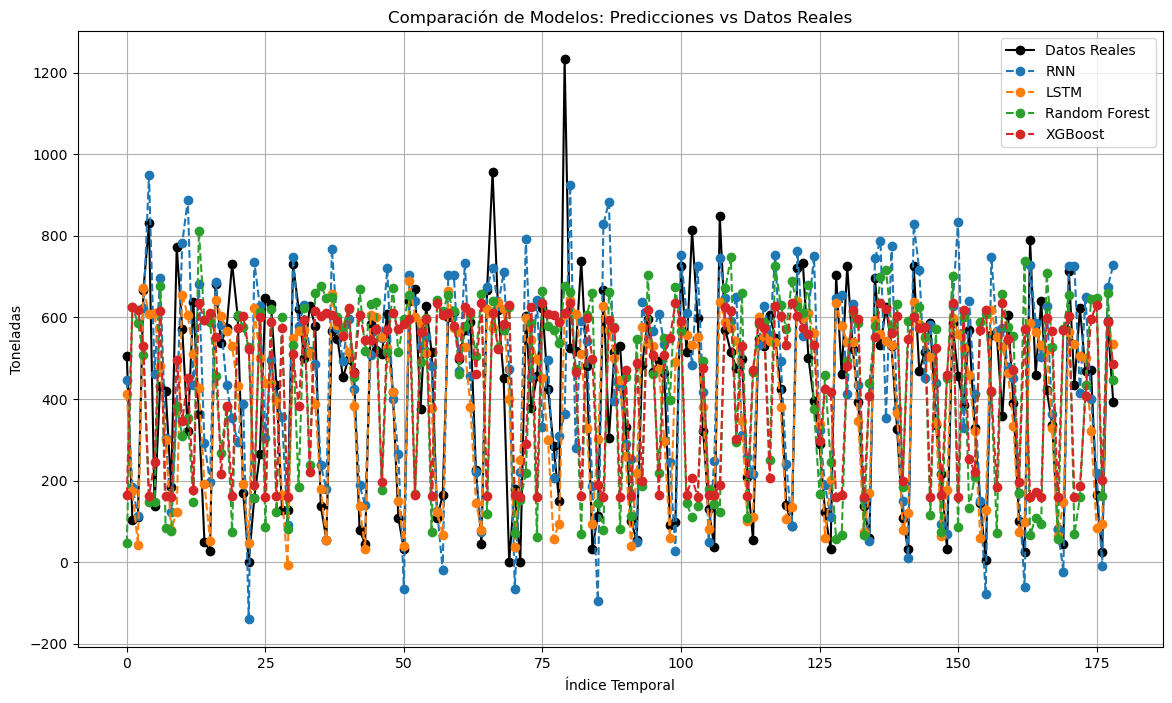

In [21]:
# Graficar resultados de entrenamiento vs. datos reales
plt.figure(figsize=(14, 8))

# Escalar de nuevo a la forma original para graficar

y_test_original = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], df_cliente_scaled.shape[1] - 1))), axis=1))[:, 0]
# Para RNN
y_pred_rnn_original = scaler.inverse_transform(np.concatenate((y_pred_rnn.reshape(-1, 1), np.zeros((y_pred_rnn.shape[0], df_cliente_scaled.shape[1] - 1))), axis=1))[:, 0]

# Para LSTM
y_pred_lstm_original = scaler.inverse_transform(np.concatenate((y_pred_lstm.reshape(-1, 1), np.zeros((y_pred_lstm.shape[0], df_cliente_scaled.shape[1] - 1))), axis=1))[:, 0]

# Para Random Forest
y_pred_rf_original = scaler.inverse_transform(np.concatenate((y_pred_rf.reshape(-1, 1), np.zeros((y_pred_rf.shape[0], df_cliente_scaled.shape[1] - 1))), axis=1))[:, 0]

# Para XGBoost
y_pred_xgb_original = scaler.inverse_transform(np.concatenate((y_pred_xgb.reshape(-1, 1), np.zeros((y_pred_xgb.shape[0], df_cliente_scaled.shape[1] - 1))), axis=1))[:, 0]

# Datos Reales
plt.plot(y_test_original, label='Datos Reales',marker='o', color='black')

# RNN
plt.plot(y_pred_rnn_original, label='RNN',marker='o', linestyle='--')

# LSTM
plt.plot(y_pred_lstm_original, label='LSTM',marker='o', linestyle='--')

# Random Forest
plt.plot(y_pred_rf_original, label='Random Forest',marker='o', linestyle='--')

# XGBoost
plt.plot(y_pred_xgb_original, label='XGBoost',marker='o', linestyle='--')

plt.title('Comparación de Modelos: Predicciones vs Datos Reales')
plt.xlabel('Índice Temporal')
plt.ylabel('Toneladas')
plt.legend()
plt.grid(True)
plt.show()



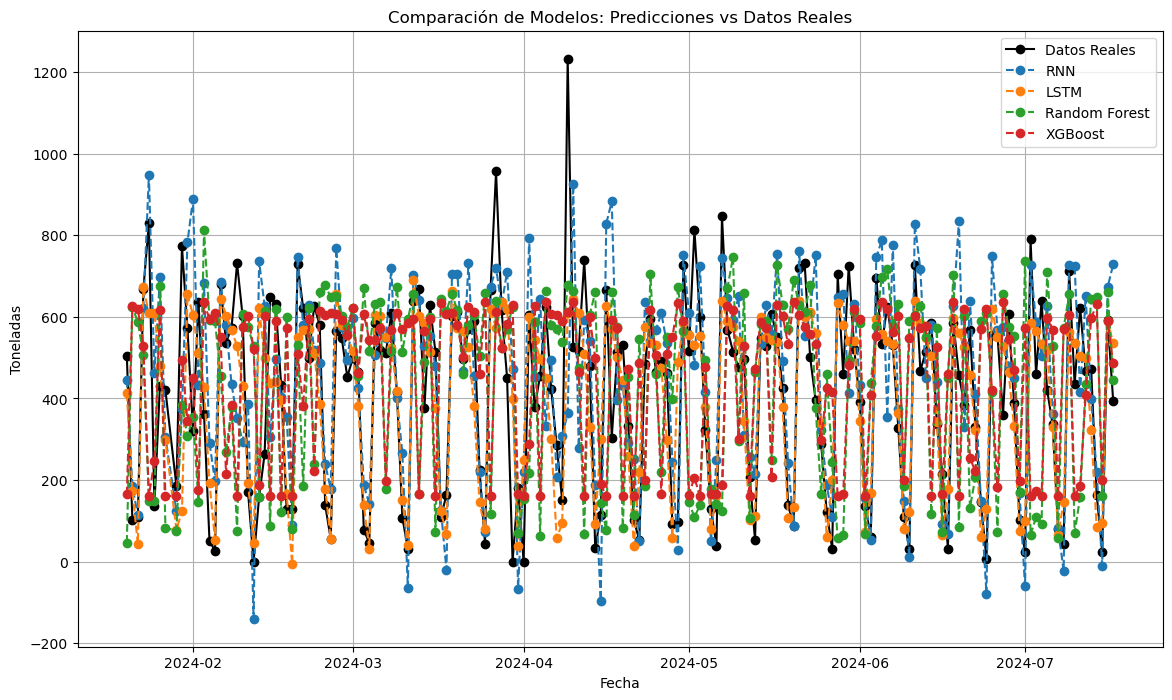

In [22]:
# Supongamos que tienes un array o una Serie llamada 'fechas_test' que contiene las fechas correspondientes a y_test
#fechas_test = df_cliente.index[-len(y_test):]  # Ajustar para que coincida con la longitud de y_test
fechas_test = df_cliente.index[-len(y_test):] + pd.DateOffset(months=0)

plt.figure(figsize=(14, 8))


# Datos Reales
plt.plot(fechas_test, y_test_original, label='Datos Reales',marker='o', color='black')

# RNN
plt.plot(fechas_test, y_pred_rnn_original, label='RNN',marker='o', linestyle='--')

# LSTM
plt.plot(fechas_test, y_pred_lstm_original, label='LSTM',marker='o', linestyle='--')

# Random Forest
plt.plot(fechas_test, y_pred_rf_original, label='Random Forest',marker='o', linestyle='--')

# XGBoost
plt.plot(fechas_test, y_pred_xgb_original, label='XGBoost',marker='o', linestyle='--')

plt.title('Comparación de Modelos: Predicciones vs Datos Reales')
plt.xlabel('Fecha')
plt.ylabel('Toneladas')
plt.legend()
plt.grid(True)
plt.show()


In [23]:


# Datos Reales (Train y Test)
y_train_original = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], 1))), axis=1))[:, 0]

y_train_rnn = model_rnn.predict(X_train)
y_pred_rnn_train_original = scaler.inverse_transform(np.concatenate((y_train_rnn, np.zeros((y_train_rnn.shape[0], 1))), axis=1))[:, 0]


# LSTM (Train y Test)
y_train_lstm = model_lstm.predict(X_train)
y_pred_lstm_train_original = scaler.inverse_transform(np.concatenate((y_train_lstm, np.zeros((y_train_lstm.shape[0], 1))), axis=1))[:, 0]




23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


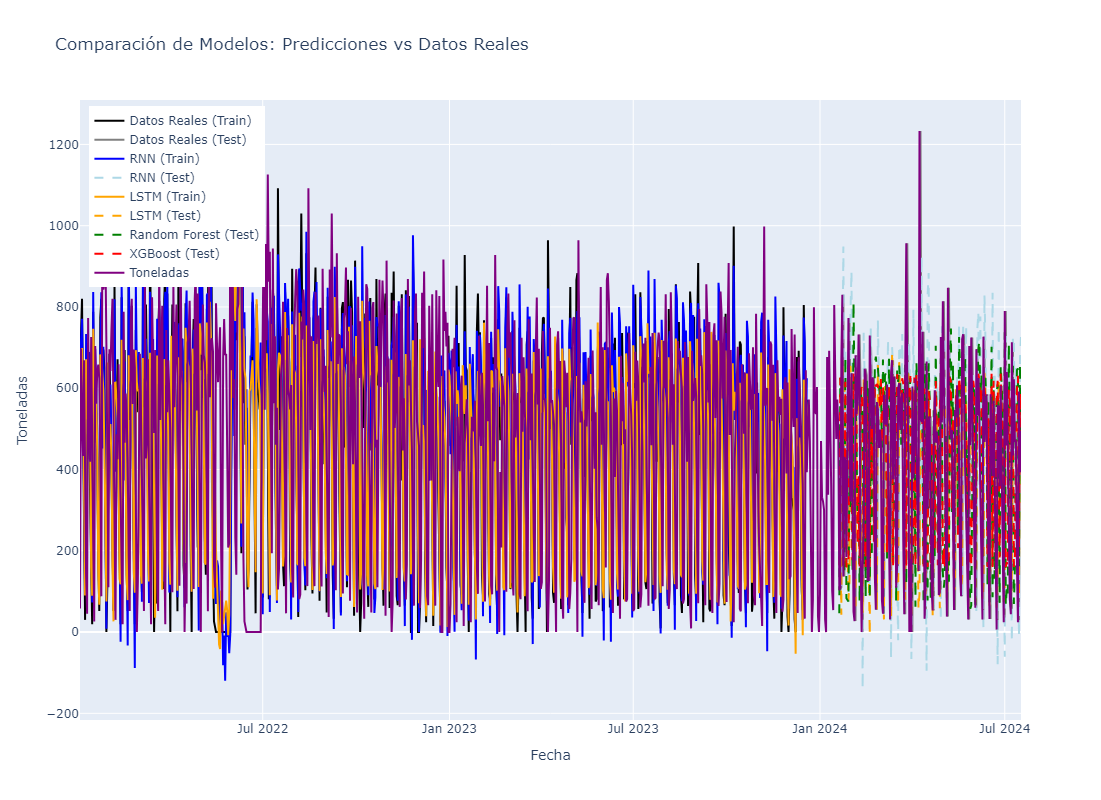

In [24]:
import plotly.graph_objs as go
import pandas as pd
import numpy as np

# Fechas ajustadas
fechas_train = df_cliente.index[:len(y_train)] + pd.DateOffset(weeks=0)
fechas_test = df_cliente.index[-len(y_test):] - pd.DateOffset(weeks=0)

# Datos reales (Train y Test)
y_train_original = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], 1))), axis=1))[:, 0]

# Crear trazas para cada conjunto de datos
traces = []

# Datos Reales (Train)
traces.append(go.Scatter(x=fechas_train, y=y_train_original, mode='lines', name='Datos Reales (Train)', marker=dict(color='black')))

# Datos Reales (Test)
traces.append(go.Scatter(x=fechas_test, y=y_test_original, mode='lines', name='Datos Reales (Test)', marker=dict(color='gray')))

# RNN (Train)
traces.append(go.Scatter(x=fechas_train, y=y_pred_rnn_train_original, mode='lines', name='RNN (Train)', marker=dict(color='blue')))

# RNN (Test)
traces.append(go.Scatter(x=fechas_test, y=y_pred_rnn_original, mode='lines', name='RNN (Test)', line=dict(dash='dash', color='lightblue')))

# LSTM (Train)
traces.append(go.Scatter(x=fechas_train, y=y_pred_lstm_train_original, mode='lines', name='LSTM (Train)', marker=dict(color='orange')))

# LSTM (Test)
traces.append(go.Scatter(x=fechas_test, y=y_pred_lstm_original, mode='lines', name='LSTM (Test)', line=dict(dash='dash', color='orange')))

# Random Forest (Test)
traces.append(go.Scatter(x=fechas_test, y=y_pred_rf_original, mode='lines', name='Random Forest (Test)', line=dict(dash='dash', color='green')))

# XGBoost (Test)
traces.append(go.Scatter(x=fechas_test, y=y_pred_xgb_original, mode='lines', name='XGBoost (Test)', line=dict(dash='dash', color='red')))

# Toneladas
traces.append(go.Scatter(x=df_cliente.index, y=df_cliente['Toneladas'], mode='lines', name='Toneladas', marker=dict(color='purple')))

# Crear el layout del gráfico
layout = go.Layout(
    title='Comparación de Modelos: Predicciones vs Datos Reales',
    xaxis=dict(title='Fecha', showgrid=True),
    yaxis=dict(title='Toneladas', showgrid=True),
    legend=dict(x=0.01, y=0.99),
    width=1000,  # Ajusta el ancho del gráfico
    height=800
)

# Crear la figura
fig = go.Figure(data=traces, layout=layout)

# Mostrar el gráfico interactivo
fig.show()


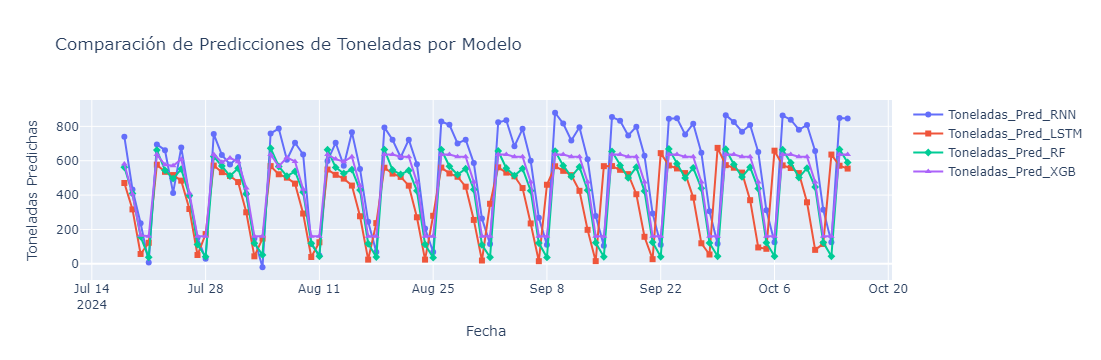

In [25]:
import plotly.graph_objs as go
import pandas as pd

# Creación de trazas para cada modelo con marcadores
trace_rnn = go.Scatter(
    x=df_predictions['Fecha'],
    y=df_predictions['Toneladas_Pred_RNN'],
    mode='lines+markers',  # Agrega 'markers' para incluir los puntos
    name='Toneladas_Pred_RNN',
    marker=dict(symbol='circle', size=6)  # Puedes ajustar el símbolo y el tamaño del marcador
)

trace_lstm = go.Scatter(
    x=df_predictions['Fecha'],
    y=df_predictions['Toneladas_Pred_LSTM'],
    mode='lines+markers',  # Agrega 'markers' para incluir los puntos
    name='Toneladas_Pred_LSTM',
    marker=dict(symbol='square', size=6)  # Diferente símbolo para diferenciar visualmente
)

trace_rf = go.Scatter(
    x=df_predictions['Fecha'],
    y=df_predictions['Toneladas_Pred_RF'],
    mode='lines+markers',  # Agrega 'markers' para incluir los puntos
    name='Toneladas_Pred_RF',
    marker=dict(symbol='diamond', size=6)  # Diferente símbolo
)

trace_xgb = go.Scatter(
    x=df_predictions['Fecha'],
    y=df_predictions['Toneladas_Pred_XGB'],
    mode='lines+markers',  # Agrega 'markers' para incluir los puntos
    name='Toneladas_Pred_XGB',
    marker=dict(symbol='triangle-up', size=6)  # Diferente símbolo
)

# Creación del layout
layout = go.Layout(
    title='Comparación de Predicciones de Toneladas por Modelo',
    xaxis=dict(title='Fecha'),
    yaxis=dict(title='Toneladas Predichas'),
    hovermode='x unified'
)

# Creación de la figura
fig = go.Figure(data=[trace_rnn, trace_lstm, trace_rf, trace_xgb], layout=layout)

# Mostrar el gráfico interactivo
fig.show()


In [26]:
# Cargar el archivo Excel
file_path = 'C:/Users/svera3/OneDrive - SLB/SVERA3/MAESTRIA/Venta_agosto.xlsx'  # Reemplaza con la ruta correcta del archivo
df_agosto = pd.read_excel(file_path, index_col=False)


In [27]:
df_agosto.rename({'Fecha de compra':'Fecha', 'UM': 'Unidad_medida', 'COD_CLIENTE':'ID', 
           'Nombre Cliente': 'Cliente', 'Zona de CIO':'Zona_ventas', 'Nombre Zona':'Nombre_zona', 'Toneladas':'Toneladas'}, axis=1, inplace=True)

In [28]:
# Convertir la columna 'Fecha de compra' a datetime
df_agosto['Fecha'] = pd.to_datetime(df_agosto['Fecha'])

# Agrupar por COD_CLIENTE y Fecha de compra, sumando las toneladas
df_grouped_agosto = df_agosto.groupby(['ID', 'Fecha'])['Toneladas'].sum().reset_index()

# Agrupar por cliente y calcular la suma total de toneladas para cada uno
df_totales_por_cliente_agosto = df_grouped_agosto.groupby('ID')['Toneladas'].sum().reset_index()

# Ordenar por las toneladas para obtener los 5 mejores clientes
top_5_clientes_agosto = df_totales_por_cliente_agosto.sort_values(by='Toneladas', ascending=False).head(5)

# Filtrar el dataframe original por los 5 mejores clientes
df_top_5_agosto = df_grouped_agosto[df_grouped_agosto['ID'].isin(top_5_clientes_agosto['ID'])]

# Preparación de los datos para modelado (suma de toneladas para los 5 mejores clientes)
df_top_5_agosto = df_top_5_agosto.groupby('Fecha')['Toneladas'].sum().reset_index()

# Resampleo diario para obtener las toneladas por día (o puedes cambiarlo a mensual usando 'M')
df_top_5_agosto = df_top_5_agosto.set_index('Fecha')
df_top_5_agosto = df_top_5_agosto.resample('D').sum()  # Cambiar 'D' a 'M' para resamplear por meses

df_cliente_agosto = df_top_5_agosto


In [29]:
df_cliente_agosto=df_cliente_agosto.reset_index()


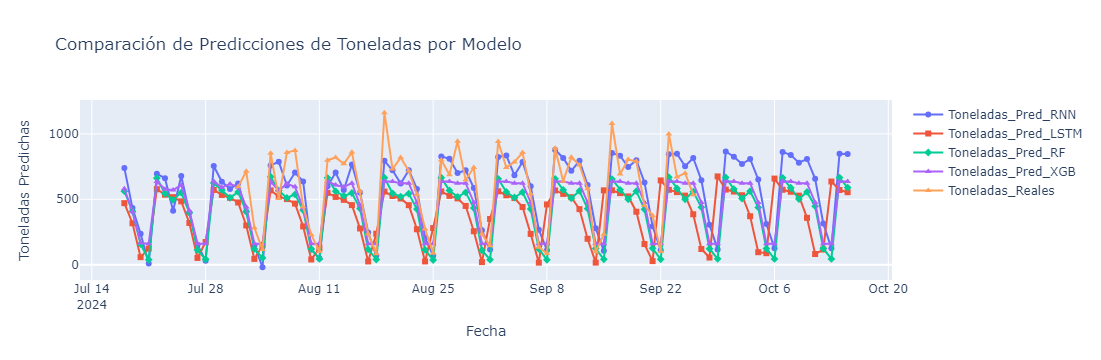

In [30]:
# Creación de trazas para cada modelo con marcadores
trace_rnn = go.Scatter(
    x=df_predictions['Fecha'],
    y=df_predictions['Toneladas_Pred_RNN'],
    mode='lines+markers',  # Agrega 'markers' para incluir los puntos
    name='Toneladas_Pred_RNN',
    marker=dict(symbol='circle', size=6)  # Puedes ajustar el símbolo y el tamaño del marcador
)

trace_lstm = go.Scatter(
    x=df_predictions['Fecha'],
    y=df_predictions['Toneladas_Pred_LSTM'],
    mode='lines+markers',  # Agrega 'markers' para incluir los puntos
    name='Toneladas_Pred_LSTM',
    marker=dict(symbol='square', size=6)  # Diferente símbolo para diferenciar visualmente
)

trace_rf = go.Scatter(
    x=df_predictions['Fecha'],
    y=df_predictions['Toneladas_Pred_RF'],
    mode='lines+markers',  # Agrega 'markers' para incluir los puntos
    name='Toneladas_Pred_RF',
    marker=dict(symbol='diamond', size=6)  # Diferente símbolo
)

trace_xgb = go.Scatter(
    x=df_predictions['Fecha'],
    y=df_predictions['Toneladas_Pred_XGB'],
    mode='lines+markers',  # Agrega 'markers' para incluir los puntos
    name='Toneladas_Pred_XGB',
    marker=dict(symbol='triangle-up', size=6)  # Diferente símbolo
)

trace_real = go.Scatter(
    x=df_cliente_agosto['Fecha'],
    y=df_cliente_agosto['Toneladas'],
    mode='lines+markers',  # Agrega 'markers' para incluir los puntos
    name='Toneladas_Reales',
    marker=dict(symbol='triangle-up', size=6)  # Diferente símbolo
)
# Creación del layout
layout = go.Layout(
    title='Comparación de Predicciones de Toneladas por Modelo',
    xaxis=dict(title='Fecha'),
    yaxis=dict(title='Toneladas Predichas'),
    hovermode='x unified'
)

# Creación de la figura
fig = go.Figure(data=[trace_rnn, trace_lstm, trace_rf, trace_xgb,trace_real], layout=layout)

# Mostrar el gráfico interactivo
fig.show()


In [31]:
fecha_inicio = '2024-08-01'
fecha_fin = '2024-09-27'

# Filtrar el DataFrame
df_filtered = df_predictions[(df_predictions['Fecha'] >= fecha_inicio) & (df_predictions['Fecha'] <= fecha_fin)]


In [32]:
df_combined = pd.merge(df_filtered, df_cliente_agosto, on='Fecha', how='left')

In [33]:
df_combined.columns

Index(['Fecha', 'Toneladas_Pred_RNN', 'Toneladas_Pred_LSTM',
       'Toneladas_Pred_RF', 'Toneladas_Pred_XGB', 'Toneladas'],
      dtype='object')

In [34]:
df_combined['error_modelo_RNN'] = abs(df_combined['Toneladas'] - df_combined['Toneladas_Pred_RNN'])
df_combined['error_modelo_LSTM'] = abs(df_combined['Toneladas'] - df_combined['Toneladas_Pred_LSTM'])
df_combined['error_modelo_RF'] = abs(df_combined['Toneladas'] - df_combined['Toneladas_Pred_RF'])
df_combined['error_modelo_XGB'] = abs(df_combined['Toneladas'] - df_combined['Toneladas_Pred_XGB'])

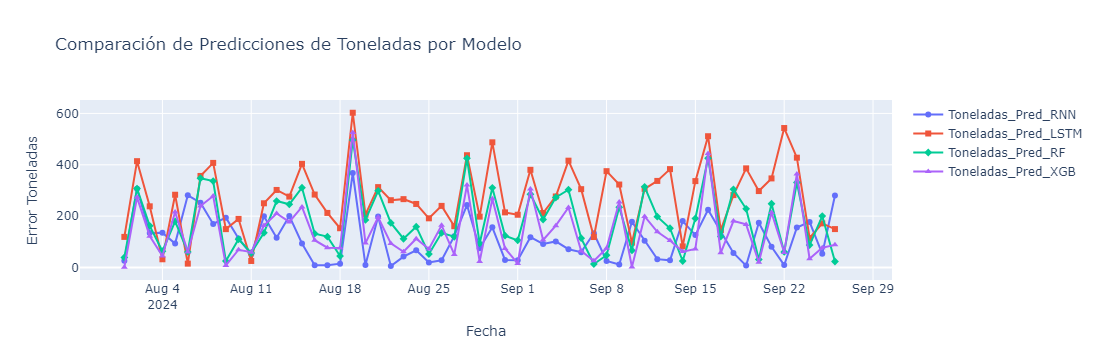

In [35]:
# Creación de trazas para cada modelo con marcadores
trace_rnn = go.Scatter(
    x=df_combined['Fecha'],
    y=df_combined['error_modelo_RNN'],
    mode='lines+markers',  # Agrega 'markers' para incluir los puntos
    name='Toneladas_Pred_RNN',
    marker=dict(symbol='circle', size=6)  # Puedes ajustar el símbolo y el tamaño del marcador
)

trace_lstm = go.Scatter(
    x=df_combined['Fecha'],
    y=df_combined['error_modelo_LSTM'],
    mode='lines+markers',  # Agrega 'markers' para incluir los puntos
    name='Toneladas_Pred_LSTM',
    marker=dict(symbol='square', size=6)  # Diferente símbolo para diferenciar visualmente
)

trace_rf = go.Scatter(
    x=df_combined['Fecha'],
    y=df_combined['error_modelo_RF'],
    mode='lines+markers',  # Agrega 'markers' para incluir los puntos
    name='Toneladas_Pred_RF',
    marker=dict(symbol='diamond', size=6)  # Diferente símbolo
)

trace_xgb = go.Scatter(
    x=df_combined['Fecha'],
    y=df_combined['error_modelo_XGB'],
    mode='lines+markers',  # Agrega 'markers' para incluir los puntos
    name='Toneladas_Pred_XGB',
    marker=dict(symbol='triangle-up', size=6)  # Diferente símbolo
)


# Creación del layout
layout = go.Layout(
    title='Comparación de Predicciones de Toneladas por Modelo',
    xaxis=dict(title='Fecha'),
    yaxis=dict(title='Error Toneladas'),
    hovermode='x unified'
)

# Creación de la figura
fig = go.Figure(data=[trace_rnn, trace_lstm, trace_rf, trace_xgb], layout=layout)

# Mostrar el gráfico interactivo
fig.show()


In [36]:
df_combined.columns

Index(['Fecha', 'Toneladas_Pred_RNN', 'Toneladas_Pred_LSTM',
       'Toneladas_Pred_RF', 'Toneladas_Pred_XGB', 'Toneladas',
       'error_modelo_RNN', 'error_modelo_LSTM', 'error_modelo_RF',
       'error_modelo_XGB'],
      dtype='object')

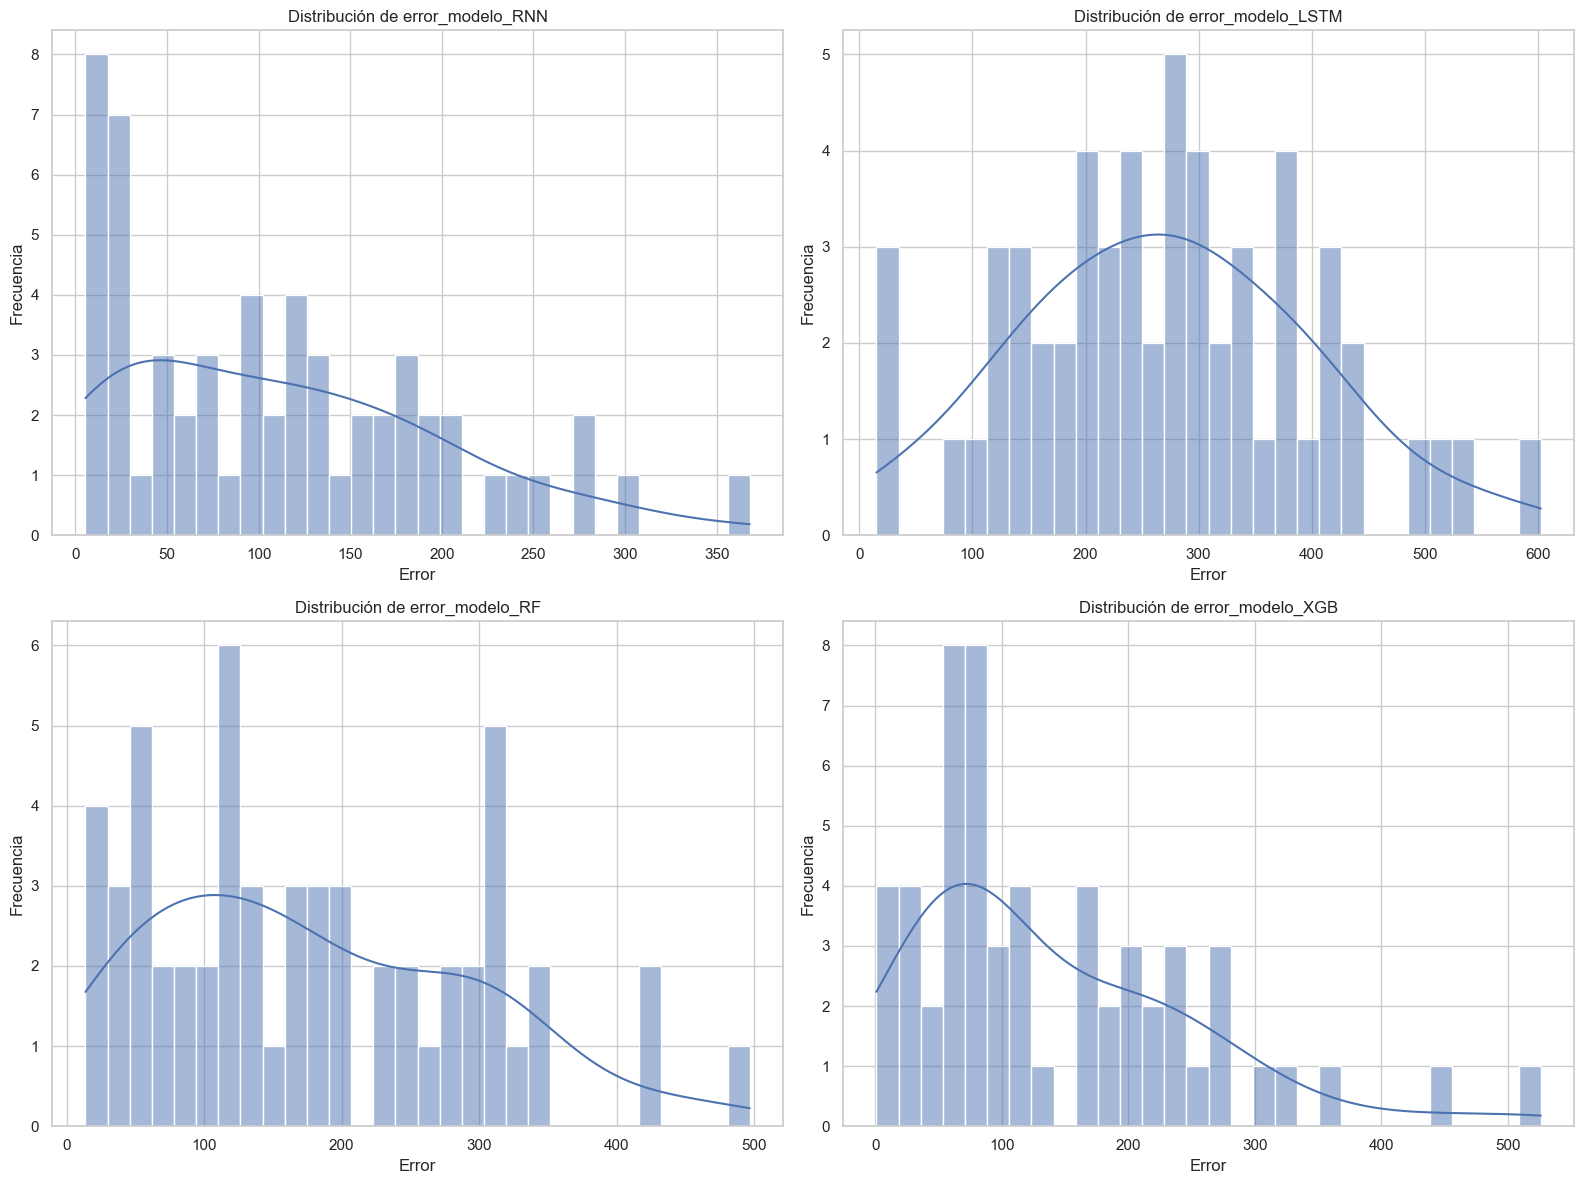

In [37]:
sns.set(style="whitegrid")
# Listado de las columnas de error
error_columns = ['error_modelo_RNN', 'error_modelo_LSTM', 'error_modelo_RF', 'error_modelo_XGB']

# Crear un gráfico para cada variable de error
plt.figure(figsize=(16, 12))

for i, col in enumerate(error_columns, 1):
    plt.subplot(2, 2, i)  # Crear una cuadrícula de 2x2
    sns.histplot(df_combined[col], bins=30, kde=True)  # Histograma con KDE
    plt.title(f'Distribución de {col}')
    plt.xlabel('Error')
    plt.ylabel('Frecuencia')

plt.tight_layout()  # Ajustar el espacio entre gráficos
plt.show()

In [38]:
# Obtener la descripción de las variables
description = df_combined[error_columns].describe()

# Mostrar la descripción
print(description)

       error_modelo_RNN  error_modelo_LSTM  error_modelo_RF  error_modelo_XGB
count         57.000000          57.000000        57.000000         57.000000
mean         112.559559         271.407049       178.816702        140.499187
std           88.059543         129.449088       117.431919        112.213836
min            5.522217          15.120239        13.454500          0.979614
25%           29.476105         189.275726        87.200000         61.263336
50%          101.664734         276.141144       158.993500        105.263336
75%          174.093994         356.525604       272.526500        210.529907
max          368.025635         602.643616       496.919000        526.106934


In [39]:
# Extraer el día de la semana
df_combined['dia_semana'] = df_combined['Fecha'].dt.day_name()
# Calcular el promedio de error por día de la semana
promedios_error = df_combined.groupby('dia_semana')[['error_modelo_RNN', 'error_modelo_LSTM', 'error_modelo_RF', 'error_modelo_XGB']].mean()
# Definir el orden de los días de la semana
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
# Asegurarse de que los días estén en el orden correcto
promedios_error = promedios_error.reindex(orden_dias)


<Figure size 1000x600 with 0 Axes>

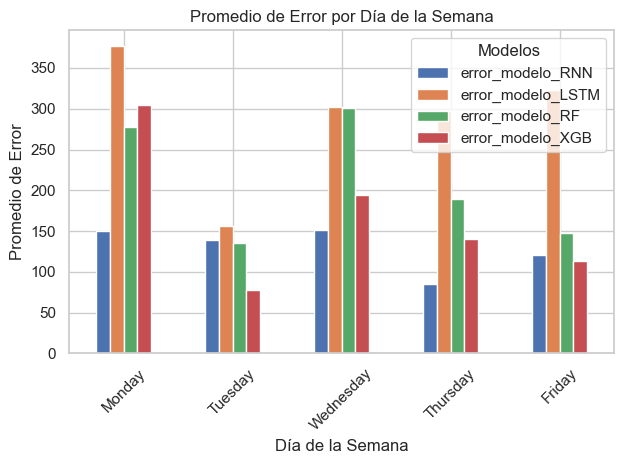

In [40]:

# Configurar el estilo
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(10, 6))
promedios_error.plot(kind='bar')
plt.title('Promedio de Error por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Promedio de Error')
plt.xticks(rotation=45)
plt.legend(title='Modelos')
plt.tight_layout()  # Ajustar el espacio
plt.show()


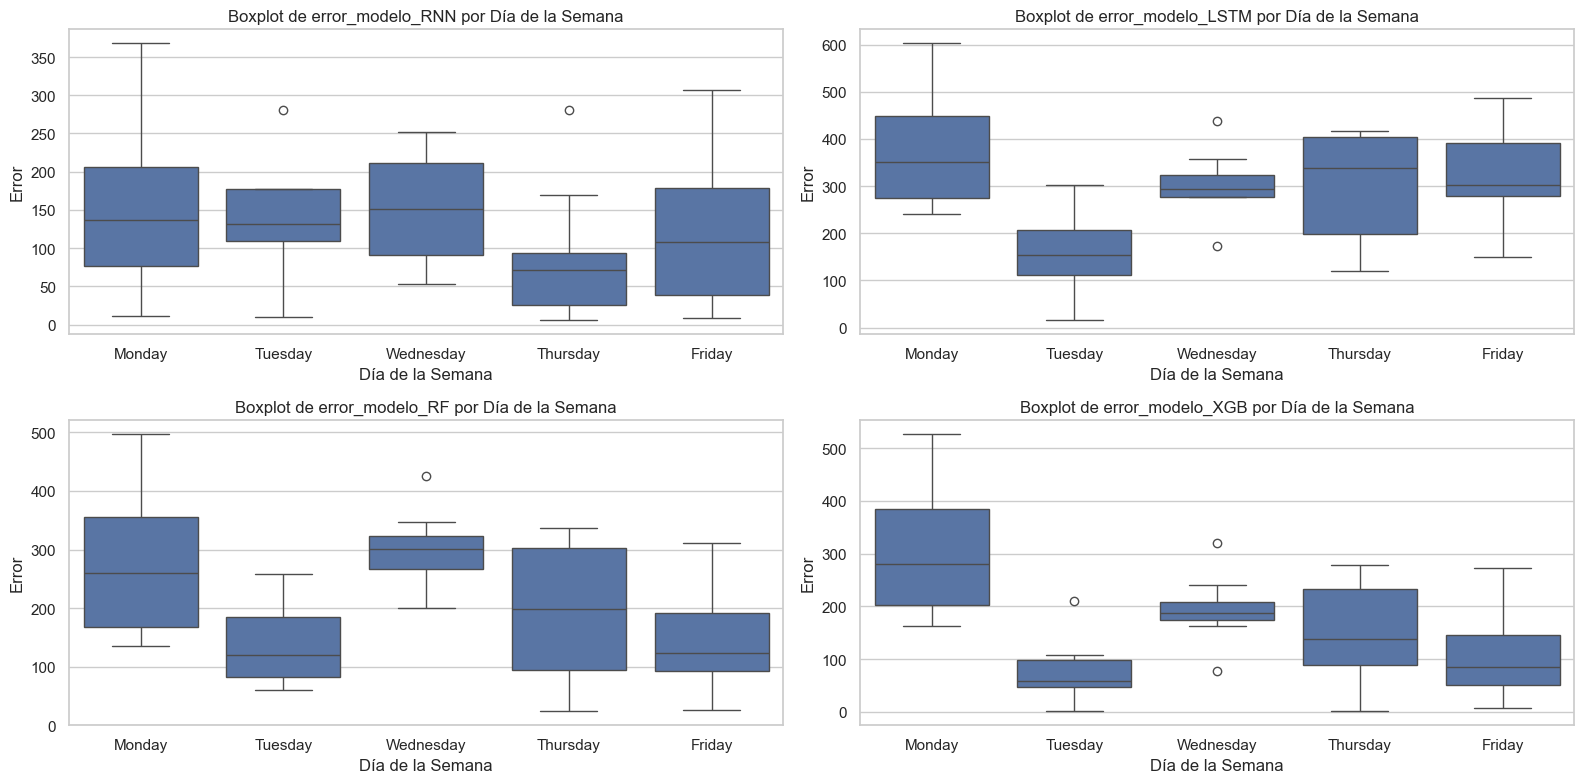

In [41]:

# Configurar el estilo
sns.set(style="whitegrid")

# Crear una figura
plt.figure(figsize=(16, 8))

# Crear boxplots para cada modelo
for i, col in enumerate(['error_modelo_RNN', 'error_modelo_LSTM', 'error_modelo_RF', 'error_modelo_XGB'], 1):
    plt.subplot(2, 2, i)  # Crear una cuadrícula de 2x2
    sns.boxplot(x='dia_semana', y=col, data=df_combined, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
    plt.title(f'Boxplot de {col} por Día de la Semana')
    plt.xlabel('Día de la Semana')
    plt.ylabel('Error')

plt.tight_layout()  # Ajustar el espacio entre gráficos
plt.show()


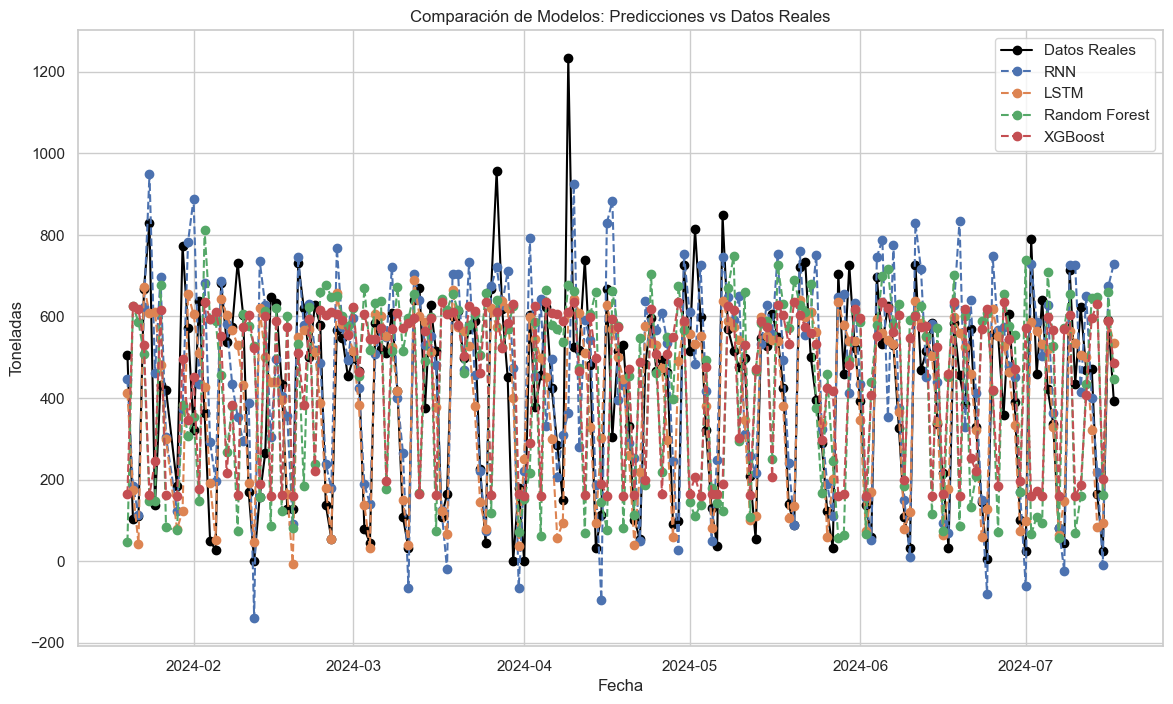

In [42]:
# Supongamos que tienes un array o una Serie llamada 'fechas_test' que contiene las fechas correspondientes a y_test
#fechas_test = df_cliente.index[-len(y_test):]  # Ajustar para que coincida con la longitud de y_test
fechas_test = df_cliente.index[-len(y_test):] + pd.DateOffset(months=0)

plt.figure(figsize=(14, 8))


# Datos Reales
plt.plot(fechas_test, y_test_original, label='Datos Reales',marker='o', color='black')

# RNN
plt.plot(fechas_test, y_pred_rnn_original, label='RNN',marker='o', linestyle='--')

# LSTM
plt.plot(fechas_test, y_pred_lstm_original, label='LSTM',marker='o', linestyle='--')

# Random Forest
plt.plot(fechas_test, y_pred_rf_original, label='Random Forest',marker='o', linestyle='--')

# XGBoost
plt.plot(fechas_test, y_pred_xgb_original, label='XGBoost',marker='o', linestyle='--')

plt.title('Comparación de Modelos: Predicciones vs Datos Reales')
plt.xlabel('Fecha')
plt.ylabel('Toneladas')
plt.legend()
plt.grid(True)
plt.show()

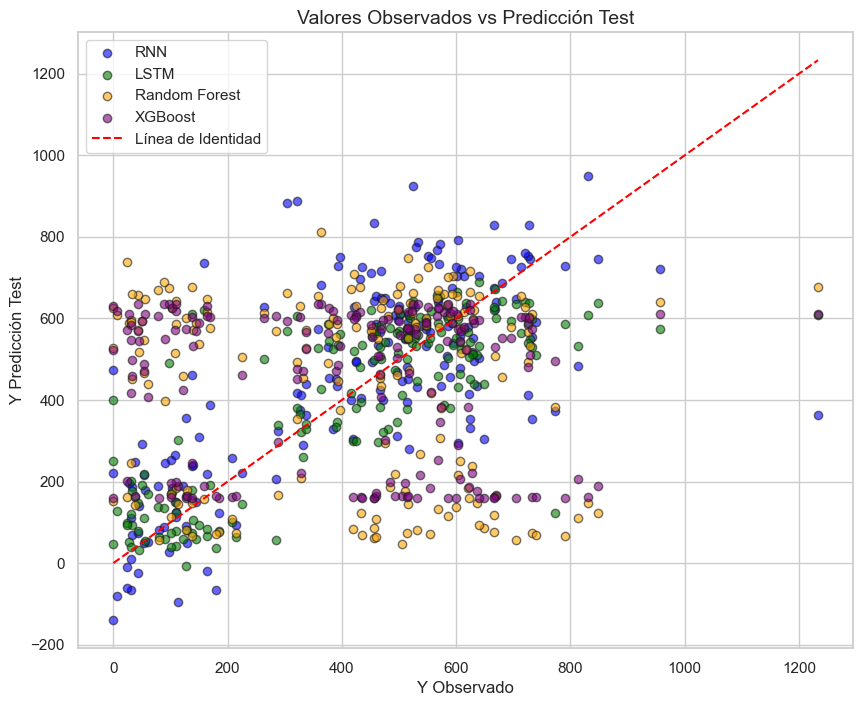

In [94]:
import matplotlib.pyplot as plt
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 8))

# Gráfico de dispersión para cada modelo
plt.scatter(y_test_original, y_pred_rnn_original, color='blue', label='RNN', alpha=0.6, edgecolors='k')
plt.scatter(y_test_original, y_pred_lstm_original, color='green', label='LSTM', alpha=0.6, edgecolors='k')
plt.scatter(y_test_original, y_pred_rf_original, color='orange', label='Random Forest', alpha=0.6, edgecolors='k')
plt.scatter(y_test_original, y_pred_xgb_original, color='purple', label='XGBoost', alpha=0.6, edgecolors='k')

# Etiquetas y título
plt.title('Valores Observados vs Predicción Test', fontsize=14)
plt.xlabel('Y Observado', fontsize=12)
plt.ylabel('Y Predicción Test', fontsize=12)

# Línea de identidad (y=x) para referencia
plt.plot([min(y_test_original), max(y_test_original)], 
         [min(y_test_original), max(y_test_original)], 
         color='red', linestyle='--', label='Línea de Identidad')

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

